# Tornadoes in Canada from 1980 to 2009

## Source

####  [Canada Open Data](https://open.canada.ca/data/en/dataset/fd3355a7-ae34-4df7-b477-07306182db69) - [License](http://open.canada.ca/en/open-government-licence-canada)

## Goals

* To look at the Government of Canada Dataset on Tornadoes from 1980 and 2009 and their impact on the Canadian population.
* To attempt to better understand where tornadoes are more likely and when.
* To attempt to understand the financial impact on Canadians of tornadoes.

## Limitations of Dataset

* The only data available from the Government of Canada covers the 1980 to 2009 period.
* There is missing data on the total size of tornadoes.  No distinction is made on what F category a tornado has. A F1 tornado is treated the same as a F4 tornado for example.
* This only captures tornadoes that were recorded.  It would not take into account tornadoes that hit non populated areas.  Therefore I always qualify findings as 'tornadoes in populated communities'. No data can really be discerned on the amount of activity country wide.
* As this is a learning exercise only, no attempt is being made to add extra data from other sources or the periods of 2010-2019.  The goal is to see what this government provided dataset actually tells us.


## Assumptions

* Human/Animal Death/Injuries often show -999.  This can either mean no deaths or unsure.  I will assume 0 deaths
* Damage to housing is an ambiguous column.  Assumption made that 000 is 000(000) based on the amount of deaths and injuries
* House Damage data often shows -999.  This number either signifies no significant damage or unknown.  I will assume 0 damage.

## Interesting work happening today to study tornado activity in Canada

The data provided by the OpenData portal is seriously lacking.  It appears a team of researchers have taken on the task to better understand tornado activity in Canada.  

[The following link from the Weather Network provides a brief synopsis of the work happening.](https://www.theweathernetwork.com/ca/news/article/northern-tornadoes-project-aims-to-catch-every-twister-in-canada-in-2019-environment-canada-western-university
)




In [1]:
%matplotlib inline
import pandas as pd
import folium
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [2]:
from IPython.core.display import HTML
css = open('../css/style-table.css').read() + open('../css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df = pd.read_csv('../data/tornadoes.csv', encoding = "ISO-8859-1")

In [4]:
df.head(1)

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,YYYYMMDDHH,YYYY_SOLAR,MM_SOLAR,DD_SOLAR,HHMM_SOLAR,NEAR_CMMTY,...,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_,HUMAN_FATA,HUMAN_INJ,ANIMAL_FAT,ANIMAL_INJ,DMG_THOUS,FORECAST_R
0,1980.0,4.0,6.0,1920.0,19800407 0020,1980.0,4.0,6.0,1847.0,Altona,...,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,Morden - Winkler - Altona - Emerson - Morris


In [5]:
# Number of tornadoes recorded in Canada from 1980 to 2009
len(df)

1839

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 25 columns):
YYYY_LOCAL    1839 non-null float64
MM_LOCAL      1839 non-null float64
DD_LOCAL      1839 non-null float64
HHMM_LOCAL    1839 non-null float64
YYYYMMDDHH    1714 non-null object
YYYY_SOLAR    1839 non-null float64
MM_SOLAR      1839 non-null float64
DD_SOLAR      1839 non-null float64
HHMM_SOLAR    1839 non-null float64
NEAR_CMMTY    1839 non-null object
PROVINCE      1839 non-null object
FUJITA        1839 non-null int64
START_LAT_    1839 non-null float64
START_LON_    1839 non-null float64
END_LAT_N     1839 non-null float64
END_LON_W     1839 non-null float64
LENGTH_M      1839 non-null int64
MOTION_DEG    1839 non-null int64
WIDTH_MAX_    1839 non-null int64
HUMAN_FATA    1839 non-null int64
HUMAN_INJ     1839 non-null int64
ANIMAL_FAT    1839 non-null int64
ANIMAL_INJ    1839 non-null int64
DMG_THOUS     1839 non-null float64
FORECAST_R    1839 non-null object
dtypes: float

In [7]:
columns_of_interest = ['YYYY_LOCAL', 'MM_LOCAL', 'DD_LOCAL', 'HHMM_LOCAL', 
                       'NEAR_CMMTY','PROVINCE', 'START_LAT_', 'START_LON_', 'END_LAT_N',
                       'END_LON_W', 'LENGTH_M', 'MOTION_DEG', 'WIDTH_MAX_', 'HUMAN_FATA', 
                       'HUMAN_INJ', 'ANIMAL_FAT', 'ANIMAL_FAT', 'DMG_THOUS']
df = df[columns_of_interest]

In [8]:
df.head(1)

,YYYY_LOCAL,MM_LOCAL,DD_LOCAL,HHMM_LOCAL,NEAR_CMMTY,PROVINCE,START_LAT_,START_LON_,END_LAT_N,END_LON_W,LENGTH_M,MOTION_DEG,WIDTH_MAX_,HUMAN_FATA,HUMAN_INJ,ANIMAL_FAT,ANIMAL_FAT,DMG_THOUS
0,1980.0,4.0,6.0,1920.0,Altona,MB,49.105,-97.568,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0


In [9]:
df.columns=['year', 'month', 'day', 'hhmm', 'community', 
            'province', 'start_lat_n', 'start_lon_w', 'end_lat_n', 
            'end_lon_w', 'length', 'motion_deg', 'width_max', 
            'human_deaths', 'human_injuries', 'animal_deaths', 'animal_injuries',
             'house_damage']

In [10]:
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage
0,1980.0,4.0,6.0,1920.0,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0
1,1980.0,5.0,5.0,2000.0,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0


In [11]:
# Over 80% of readings don't provide end lon/lat
df.end_lon_w.value_counts().head()

-999.000    1580
-79.545        2
-80.823        2
-79.305        1
-84.017        1
Name: end_lon_w, dtype: int64

In [12]:
df.dtypes

year               float64
month              float64
day                float64
hhmm               float64
community           object
province            object
start_lat_n        float64
start_lon_w        float64
end_lat_n          float64
end_lon_w          float64
length               int64
motion_deg           int64
width_max            int64
human_deaths         int64
human_injuries       int64
animal_deaths        int64
animal_injuries      int64
house_damage       float64
dtype: object

In [13]:
df['year'] = df.year.astype(int)
df['month'] = df.month.astype(int)
df['day'] = df.day.astype(int)
df['hhmm'] = df.hhmm.astype(int)
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0


In [14]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [15]:
df.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.000000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,1980-04-06
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0,1980-05-05
2,1980,5,25,1750,Creelman,SK,49.840000,-103.630000,-999.000000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,1980-05-25
3,1980,5,28,1700,16 km S of Morden,MB,49.190000,-98.100000,-999.000000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,1980-05-28
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,0,0,0,0,900.0,1980-05-31


In [16]:
df.dtypes

year                        int64
month                       int64
day                         int64
hhmm                        int64
community                  object
province                   object
start_lat_n               float64
start_lon_w               float64
end_lat_n                 float64
end_lon_w                 float64
length                      int64
motion_deg                  int64
width_max                   int64
human_deaths                int64
human_injuries              int64
animal_deaths               int64
animal_injuries             int64
house_damage              float64
date               datetime64[ns]
dtype: object

In [17]:
df['hour'] = df['hhmm'].apply(lambda x: str(x)[:-2])

In [18]:
df.head(2)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,-999.0000,-999.000000,-999,-999,-999,-999,-999,-999,-999,-999.0,1980-04-06,19
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.3897,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0,1980-05-05,20


In [19]:
df.dtypes

year                        int64
month                       int64
day                         int64
hhmm                        int64
community                  object
province                   object
start_lat_n               float64
start_lon_w               float64
end_lat_n                 float64
end_lon_w                 float64
length                      int64
motion_deg                  int64
width_max                   int64
human_deaths                int64
human_injuries              int64
animal_deaths               int64
animal_injuries             int64
house_damage              float64
date               datetime64[ns]
hour                       object
dtype: object

In [20]:
#Most Active years for tornodoes
df.year.value_counts().head(10)

1991    94
1999    92
1984    76
1986    73
1990    72
1988    70
1982    69
1983    67
2000    67
1996    67
Name: year, dtype: int64

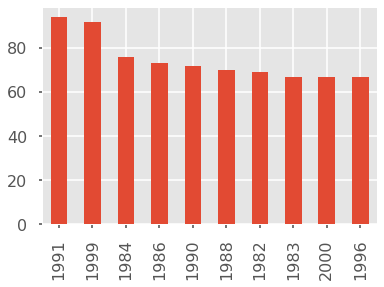

In [21]:
# Graph the most active years
df.year.value_counts().head(10).plot(kind='bar')

In [22]:
# Average number of tornadoes per year
df.year.value_counts().mean()

61.3

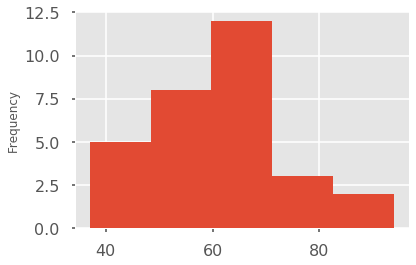

In [23]:
# The sample size is too small but already we can see a normal distribution taking shape.  The following 
# graph shows a distibution of tornadoes per year.
df.year.value_counts().plot(kind='hist', bins=5)

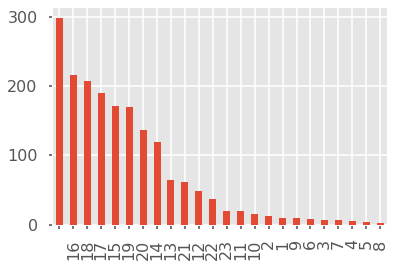

In [24]:
#most active hours of the day
df.hour.value_counts().plot(kind='bar')

Data looks off.  It is unlikely that midnight sees the highest frequency.  More likely that no hour is recorded but still assigned hour 0 based on the amounts later in the night and early morning.

Late afternoon / Early evening (between 3pm-6pm) appears to be most likely time for a tornado

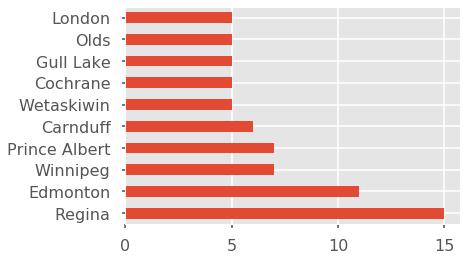

In [25]:
#Top 10 cities have the highest tornado activity
df.community.value_counts().head(10).plot(kind='barh')

cities in western canada see the highest tornado activity (Top 4)

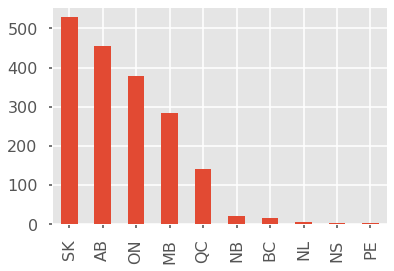

In [26]:
# Graph activity frequency by Province
df.province.value_counts().head(10).plot(kind='bar')

In [27]:
# Looking at Canada's largent province by population
df_on = df[df.province == 'ON']
df_on.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,-999,-999,-999,-999,-999.0,1980-05-05,20
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,0,0,0,0,900.0,1980-05-31,13
5,1980,6,9,1115,Whitby,ON,43.883971,-78.971305,43.883653,-78.970864,50,315,-999,-999,-999,-999,-999,1.0,1980-06-09,11
10,1980,7,15,1505,Wellesley,ON,43.489469,-80.767201,43.494084,-80.749729,1500,250,-999,-999,-999,-999,-999,50.0,1980-07-15,15
11,1980,7,16,936,LaSalle,ON,42.244189,-83.100691,42.229000,-83.027000,6350,285,-999,-999,-999,10,10,500.0,1980-07-16,9


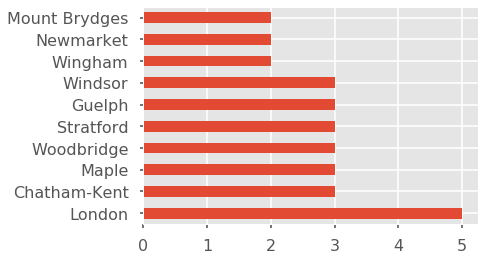

In [28]:
# Top 10 communities in Ontario for tornado activity
df_on.community.value_counts().head(10).plot(kind='barh')

In [29]:
# Looking at Cochrane specifically as it was mentioned in the national top 10 earlier.
df[df.community == 'Cochrane']

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
127,1982,8,8,1545,Cochrane,ON,49.038,-81.388,49.126,-81.383,9820,180,-999,0,0,0,0,100.0,1982-08-08,15
333,1985,6,28,1800,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,-999,-999,-999,-999,40.0,1985-06-28,18
403,1986,7,13,1530,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,-999,-999,-999,-999,-999.0,1986-07-13,15
1265,1999,0,0,0,Cochrane,AB,51.180,-114.470,-999.000,-999.000,-999,-999,-999,-999,-999,-999,-999,-999.0,NaT,
1553,2005,6,4,2030,Cochrane,AB,51.180,-114.430,-999.000,-999.000,-999,-999,-999,-999,-999,-999,-999,-999.0,2005-06-04,20


The Top 10 cities had Cochrane listed.  I assumed Cochrane Ontario had 5 tornadoes but they did not show up in Ontario top 10.  Turns out there is a Cochrane Alberta

In [30]:
len(df.date.unique())

938

## Most active tornado days are most likely the same tornado systems hitting communities that are in proximity

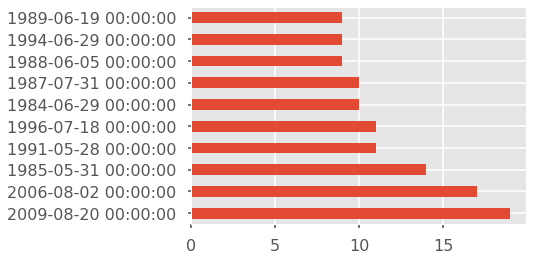

In [31]:
# most active community days for tornadoes
df.date.value_counts().head(10).plot(kind='barh')

In [32]:
#Who had tornadoes on the most active day
df20090820 = df[df.date == '2009-08-20']

In [33]:
# Ontario communities that got hit on 2009-08-20
df20090820

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
1811,2009,8,20,1600,Durham,ON,44.077300,-80.934400,44.427500,-80.581100,48000,215,400,1,0,0,0,0.0,2009-08-20,16
1812,2009,8,20,1640,The Blue Mountains,ON,44.454800,-80.482500,44.537000,-80.373300,12500,225,400,0,0,0,0,0.0,2009-08-20,16
1813,2009,8,20,1730,New Lowell,ON,44.352600,-79.974200,44.453900,-79.902100,12600,210,70,0,0,0,0,10.0,2009-08-20,17
1814,2009,8,20,1730,Arnstein,ON,45.885061,-79.955382,45.889943,-79.939481,1340,245,-999,0,0,0,0,0.0,2009-08-20,17
1815,2009,8,20,1750,Newmarket,ON,44.077358,-79.355971,44.094693,-79.336519,2470,220,300,0,0,0,0,0.0,2009-08-20,17
1816,2009,8,20,1805,Woodbridge,ON,43.761134,-79.628703,43.827064,-79.550958,9620,230,-999,0,0,0,0,0.0,2009-08-20,18
1817,2009,8,20,1810,Moonstone,ON,44.629400,-79.679291,44.652118,-79.654182,3220,220,-999,0,0,0,0,0.0,2009-08-20,18
1818,2009,8,20,1830,Dollars Lake,ON,45.934887,-80.224121,45.942346,-80.214683,1100,220,-999,0,0,0,0,0.0,2009-08-20,18
1819,2009,8,20,1830,Milton,ON,43.514084,-79.881796,43.518936,-79.870033,1090,240,200,0,0,0,0,0.0,2009-08-20,18
1820,2009,8,20,1830,North Bay,ON,46.310000,-79.470000,-999.000000,-999.000000,-999,-999,-999,0,0,0,0,0.0,2009-08-20,18


In [34]:
# Ontario communities that got hit on 2006-08-02
df20060802 = df[df.date == '2006-08-02']
df20060802

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
1637,2006,8,2,1525,Morriston,ON,43.450000,-80.083300,-999.000,-999.000000,-999,-999,-999,0,0,0,0,0.0,2006-08-02,15
1638,2006,8,2,1815,Jacksons Cove,ON,44.942000,-81.122000,44.945,-81.115000,1500,240,200,0,0,0,0,0.0,2006-08-02,18
1639,2006,8,2,1925,Uffington,ON,44.955000,-79.167000,44.954,-79.164000,250,290,50,0,0,0,0,0.0,2006-08-02,19
1640,2006,8,2,1930,Marsden Lake,ON,45.230000,-78.525000,45.232,-78.446000,6200,270,200,0,1,0,0,0.0,2006-08-02,19
1641,2006,8,2,1940,Head Lake,ON,44.750000,-78.900000,-999.000,-999.000000,-999,-999,-999,0,0,0,0,0.0,2006-08-02,19
1642,2006,8,2,1940,Kashwakamak Lake,ON,44.825000,-77.115000,44.826,-77.027000,6860,270,100,0,0,0,0,0.0,2006-08-02,19
1643,2006,8,2,1945,Minden Hills,ON,45.027000,-78.782000,44.965,-78.618000,17100,300,100,0,0,0,0,0.0,2006-08-02,19
1644,2006,8,2,1950,Drag Lake,ON,45.100000,-78.494000,45.081,-78.352000,11500,285,500,0,0,0,0,0.0,2006-08-02,19
1645,2006,8,2,1950,West Guilford,ON,45.071000,-78.704000,45.123,-78.556000,13300,245,800,0,0,0,0,0.0,2006-08-02,19
1646,2006,8,2,2000,Catchacoma,ON,44.729000,-78.341000,44.730,-78.285000,4450,270,300,0,0,0,0,0.0,2006-08-02,20


# Map of all communities where a tornado touched down between 1980 and 2009 in Canada

In [35]:
# Get a list of tuples for geo coordinates to be used in plotting a tornado map
def locations(lat, lon, community, province, year, deaths):
    startlat = [la for la in lat]
    startlon = [lo for lo in lon]
    community_ = [c for c in community]
    province_ = [p for p in province]
    year_ = [y for y in year]
    death_ = [d for d in deaths]
    return list(zip(startlat, startlon, community_, province_, year_, death_))
        
coordinates = locations(df.start_lat_n, df.start_lon_w, df.community, df.province, df.year, df.human_deaths)

In [36]:
def tornado_map(coordinates, mapname):
    tornado_map = folium.Map(location=[49.641438,-97.389353], zoom_start=4)
    for coord in coordinates:
        folium.CircleMarker(location=[
            coord[0], coord[1]], 
            popup=coord[2]+coord[3]+','+str(coord[4])+'\n'+str(coord[5])+' '+'Deaths',
            radius=3).add_to(tornado_map)
    tornado_map.save(f'{mapname}.html')

tornado_map(coordinates, 'map')

#### What can we learn from the data

We see that the bulk of recorded tornado activity is centred in the Alberta, Saskatchewan, Manitoba, Southern Ontario and Southern Quebec.  

Populated coastal areas see less tornado activity.  Also, tornadoes probably hit remote areas but may not hit any areas with population centres and are therefore not recorded.


In [37]:
from IPython.display import IFrame
IFrame('map.html', width=960, height=530)

# What went on in 1991, the most active tornado year

In [38]:
df_1991 = df[df['year'] == 1991]

In [39]:
df_1991.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
695,1991,3,10,1330,Pitt Meadows,BC,49.241944,-122.671944,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,3.5,1991-03-10,13
696,1991,4,5,1245,Lac la Hache,BC,51.816667,-121.466667,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,16.0,1991-04-05,12
697,1991,5,12,1630,Maryfield,SK,49.835000,-101.415000,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,1991-05-12,16
698,1991,5,21,2230,Oungre,SK,49.150000,-103.800000,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,1991-05-21,22
699,1991,5,28,1246,Whitecourt,AB,54.150000,-115.672000,-999.0,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,1991-05-28,12


In [40]:
# The most active year was 1991 and recorded 94 tornadoes
len(df_1991)

94

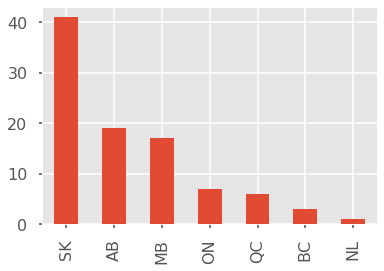

In [41]:
# Tornadoes by Province
df_1991['province'].value_counts().plot('bar')

## Map locations of tornadoes in 1991

In [42]:
coordinates91 = locations(df_1991.start_lat_n, df_1991.start_lon_w, df_1991.community, df_1991.province, df_1991.year, df_1991.human_deaths)
tornado_map(coordinates91, 'map1991')
IFrame('map1991.html', width=960, height=530)

# Map of Ontario's busiest tornado day, August 8, 2009

In [43]:
# All tornadoes recorded on August 8 2009
df20090820

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
1811,2009,8,20,1600,Durham,ON,44.077300,-80.934400,44.427500,-80.581100,48000,215,400,1,0,0,0,0.0,2009-08-20,16
1812,2009,8,20,1640,The Blue Mountains,ON,44.454800,-80.482500,44.537000,-80.373300,12500,225,400,0,0,0,0,0.0,2009-08-20,16
1813,2009,8,20,1730,New Lowell,ON,44.352600,-79.974200,44.453900,-79.902100,12600,210,70,0,0,0,0,10.0,2009-08-20,17
1814,2009,8,20,1730,Arnstein,ON,45.885061,-79.955382,45.889943,-79.939481,1340,245,-999,0,0,0,0,0.0,2009-08-20,17
1815,2009,8,20,1750,Newmarket,ON,44.077358,-79.355971,44.094693,-79.336519,2470,220,300,0,0,0,0,0.0,2009-08-20,17
1816,2009,8,20,1805,Woodbridge,ON,43.761134,-79.628703,43.827064,-79.550958,9620,230,-999,0,0,0,0,0.0,2009-08-20,18
1817,2009,8,20,1810,Moonstone,ON,44.629400,-79.679291,44.652118,-79.654182,3220,220,-999,0,0,0,0,0.0,2009-08-20,18
1818,2009,8,20,1830,Dollars Lake,ON,45.934887,-80.224121,45.942346,-80.214683,1100,220,-999,0,0,0,0,0.0,2009-08-20,18
1819,2009,8,20,1830,Milton,ON,43.514084,-79.881796,43.518936,-79.870033,1090,240,200,0,0,0,0,0.0,2009-08-20,18
1820,2009,8,20,1830,North Bay,ON,46.310000,-79.470000,-999.000000,-999.000000,-999,-999,-999,0,0,0,0,0.0,2009-08-20,18


In [44]:
# We can see that it was very windy in Southern Ontario right up to as far north as North Bay
d = df20090820
coords_on_09 = locations(d.start_lat_n, d.start_lon_w, d.community, d.province, d.year, d.human_deaths)
tornado_map(coords_on_09, 'on2009')
IFrame('on2009.html', width=960, height=530)

# Canada's worst tornadoes

The data provides information on human and animal deaths and injuries as well as damage to housing.

In [45]:
# Assuming -999 has no information recorded or there were no deaths
df['human_deaths'].unique()

array([-999,    0,    1,    4,    8,   27,   12,    3])

In [46]:
df.dtypes

year                        int64
month                       int64
day                         int64
hhmm                        int64
community                  object
province                   object
start_lat_n               float64
start_lon_w               float64
end_lat_n                 float64
end_lon_w                 float64
length                      int64
motion_deg                  int64
width_max                   int64
human_deaths                int64
human_injuries              int64
animal_deaths               int64
animal_injuries             int64
house_damage              float64
date               datetime64[ns]
hour                       object
dtype: object

In [47]:
# Remove the -999 value and assume 0 deaths.
df.replace(-999, 0, inplace=True)

In [48]:
df['human_injuries'].unique()

array([  0,   1,  13,  10,   7,   5,  40,   4,  33,   3,  69, 155, 300,
         2,  15,   6, 130,  19])

In [49]:
df.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-04-06,19
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,0,0,0,0,0.0,1980-05-05,20
2,1980,5,25,1750,Creelman,SK,49.840000,-103.630000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-05-25,17
3,1980,5,28,1700,16 km S of Morden,MB,49.190000,-98.100000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-05-28,17
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,0,0,0,0,900.0,1980-05-31,13


# Fatalities and Injuries

In [50]:
len(df.date.unique())

938

In [51]:
df['human_deaths'].unique()

array([ 0,  1,  4,  8, 27, 12,  3])

In [52]:
df.head()

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
0,1980,4,6,1920,Altona,MB,49.105000,-97.568000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-04-06,19
1,1980,5,5,2000,Stratford,ON,43.385625,-81.012735,43.389700,-80.963823,4190,265,30,0,0,0,0,0.0,1980-05-05,20
2,1980,5,25,1750,Creelman,SK,49.840000,-103.630000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-05-25,17
3,1980,5,28,1700,16 km S of Morden,MB,49.190000,-98.100000,0.000000,0.000000,0,0,0,0,0,0,0,0.0,1980-05-28,17
4,1980,5,31,1334,Georgetown to Woodbridge,ON,43.652990,-79.930887,43.762647,-79.643235,26300,245,490,0,0,0,0,900.0,1980-05-31,13


In [53]:
print('Human Deaths = {}'.format(df['human_deaths'].sum()))
print('Human Injuries = {}'.format(df['human_injuries'].sum()))
print('Animal Deaths = {}'.format(df['animal_deaths'].sum()))
print('Animal Injuries = {}'.format(df['animal_injuries'].sum()))

Human Deaths = 60
Human Injuries = 887
Animal Deaths = 110157
Animal Injuries = 110157


In [54]:
# All Tornadoes with deaths recorded between 1980 and 2009
c = df
c = c[c['human_deaths'] > 0].sort_values('human_deaths', ascending=False)
c

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
460,1987,7,31,1503,Edmonton #1,AB,53.364000,-113.377000,53.639679,-113.347333,30800,185,1300,27,300,0,0,260000.0,1987-07-31,15
1299,2000,7,14,1900,Pine Lake,AB,52.087500,-113.597900,52.055000,-113.205000,27300,280,1600,12,130,0,0,12000.0,2000-07-14,19
319,1985,5,31,1700,Barrie,ON,44.339000,-79.738000,44.400000,-79.560000,15000,240,600,8,155,0,0,150000.0,1985-05-31,17
314,1985,5,31,1615,Grand Valley to Tottenham,ON,43.837000,-80.589000,44.133000,-79.305000,115000,250,600,4,69,0,0,2500.0,1985-05-31,16
1799,2009,7,9,2035,Near Ear Falls / Lac Seul #1,ON,50.439900,-93.153000,50.539800,-92.869900,22900,240,100,3,5,0,0,0.0,2009-07-09,20
269,1984,6,29,1753,Big Coulee,AB,54.881500,-113.281500,0.000000,0.000000,0,0,0,1,1,0,0,0.0,1984-06-29,17
282,1984,7,15,1620,Sheenboro to Bouchette,QC,45.971062,-77.232548,46.203250,-75.958338,102000,255,80,1,40,0,0,2000.0,1984-07-15,16
678,1990,8,12,2100,Norwich Township,ON,42.990000,-80.600000,0.000000,0.000000,0,0,0,1,2,0,0,0.0,1990-08-12,21
983,1995,7,15,315,Bridgenorth,ON,44.390000,-78.384000,44.389000,-78.380000,400,285,0,1,0,0,0,2600.0,1995-07-15,3
1656,2006,8,5,1719,Patricia Beach,MB,50.421000,-96.646000,50.425000,-96.384000,18900,265,300,1,7,0,0,0.0,2006-08-05,17


In [55]:
c[c['province'] == 'AB'].sort_values('human_deaths', ascending=False)

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
460,1987,7,31,1503,Edmonton #1,AB,53.3640,-113.3770,53.639679,-113.347333,30800,185,1300,27,300,0,0,260000.0,1987-07-31,15
1299,2000,7,14,1900,Pine Lake,AB,52.0875,-113.5979,52.055000,-113.205000,27300,280,1600,12,130,0,0,12000.0,2000-07-14,19
269,1984,6,29,1753,Big Coulee,AB,54.8815,-113.2815,0.000000,0.000000,0,0,0,1,1,0,0,0.0,1984-06-29,17


In [56]:
# The worst tornadoes for death, injuries
c.loc[c['human_deaths'] > 0, ['date', 'community', 'province', 'human_deaths']]

,date,community,province,human_deaths
460,1987-07-31,Edmonton #1,AB,27
1299,2000-07-14,Pine Lake,AB,12
319,1985-05-31,Barrie,ON,8
314,1985-05-31,Grand Valley to Tottenham,ON,4
1799,2009-07-09,Near Ear Falls / Lac Seul #1,ON,3
269,1984-06-29,Big Coulee,AB,1
282,1984-07-15,Sheenboro to Bouchette,QC,1
678,1990-08-12,Norwich Township,ON,1
983,1995-07-15,Bridgenorth,ON,1
1656,2006-08-05,Patricia Beach,MB,1


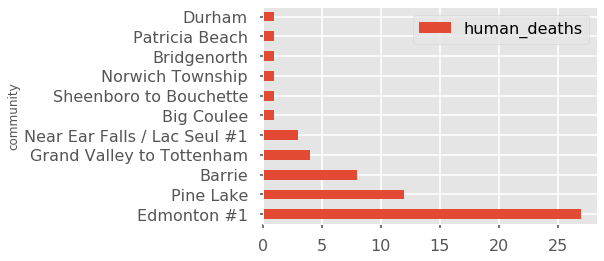

In [57]:
# graph it
c.loc[c['human_deaths'] > 0, ['community','human_deaths']].set_index('community').plot(kind='barh')

# Map of all tornadoes that caused human death from 1980 - 2009

## Click on the marker for details

In [58]:
coords_death = locations(c.start_lat_n, c.start_lon_w, c.community, c.province, c.year, c.human_deaths)
tornado_map(coords_death, 'deaths')
IFrame('deaths.html', width=960, height=530)

In [59]:
# Total of all deaths from 1980 to 2009
c['human_deaths'].sum()

60

# Look at injuries suffered from tornadoes from 1980 to 2009

In [60]:
# Total number of injuries suffered from 1980 to 2009
i = df
i['human_injuries'].sum()

887

In [61]:
# Average number of people injured per year in Canada from 1980 to 2009
round(i['human_injuries'].sum() / len(i.year.unique()), 1)

29.6

In [62]:
# The most injuries suffered in one year
i['human_injuries'].max()

300

In [63]:
# Some years saw no injuries recorded
i['human_injuries'].min()

0

In [64]:
# the top injury days in the last 30 years
# All Tornadoes with deaths recorded between 1980 and 2009
ij = i[i['human_injuries'] > 0].sort_values('human_injuries', ascending=False)
ij

,year,month,day,hhmm,community,province,start_lat_n,start_lon_w,end_lat_n,end_lon_w,length,motion_deg,width_max,human_deaths,human_injuries,animal_deaths,animal_injuries,house_damage,date,hour
460,1987,7,31,1503,Edmonton #1,AB,53.364000,-113.377000,53.639679,-113.347333,30800,185,1300,27,300,0,0,260000.0,1987-07-31,15
319,1985,5,31,1700,Barrie,ON,44.339000,-79.738000,44.400000,-79.560000,15000,240,600,8,155,0,0,150000.0,1985-05-31,17
1299,2000,7,14,1900,Pine Lake,AB,52.087500,-113.597900,52.055000,-113.205000,27300,280,1600,12,130,0,0,12000.0,2000-07-14,19
314,1985,5,31,1615,Grand Valley to Tottenham,ON,43.837000,-80.589000,44.133000,-79.305000,115000,250,600,4,69,0,0,2500.0,1985-05-31,16
282,1984,7,15,1620,Sheenboro to Bouchette,QC,45.971062,-77.232548,46.203250,-75.958338,102000,255,80,1,40,0,0,2000.0,1984-07-15,16
293,1984,9,2,1920,London,ON,42.945000,-81.249000,42.929000,-81.209000,3630,300,120,0,33,0,0,5000.0,1984-09-02,19
1657,2006,8,5,1815,McArthur Falls,MB,50.400000,-96.000000,50.365000,-95.175000,58700,275,500,0,19,0,0,0.0,2006-08-05,18
755,1991,8,27,0,Maskinongé,QC,46.226616,-73.016550,0.000000,0.000000,1500,0,150,0,15,0,0,17000.0,1991-08-27,
167,1983,5,2,1300,Reeces Corners,ON,42.905000,-82.238000,43.041000,-81.970000,30000,240,400,0,13,10000,10000,20000.0,1983-05-02,13
182,1983,7,1,1200,Dolbeau-Mistanssini,QC,48.815192,-72.313609,0.000000,0.000000,0,0,0,0,10,0,0,300.0,1983-07-01,12


In [65]:
# Number of tornadoes that recorded human injuries
len(ij)

48

In [66]:
# The worst tornadoes for injuries
ij.loc[ij['human_injuries'] > 0, ['date', 'community', 'province', 'human_injuries']]

,date,community,province,human_injuries
460,1987-07-31,Edmonton #1,AB,300
319,1985-05-31,Barrie,ON,155
1299,2000-07-14,Pine Lake,AB,130
314,1985-05-31,Grand Valley to Tottenham,ON,69
282,1984-07-15,Sheenboro to Bouchette,QC,40
293,1984-09-02,London,ON,33
1657,2006-08-05,McArthur Falls,MB,19
755,1991-08-27,Maskinongé,QC,15
167,1983-05-02,Reeces Corners,ON,13
182,1983-07-01,Dolbeau-Mistanssini,QC,10


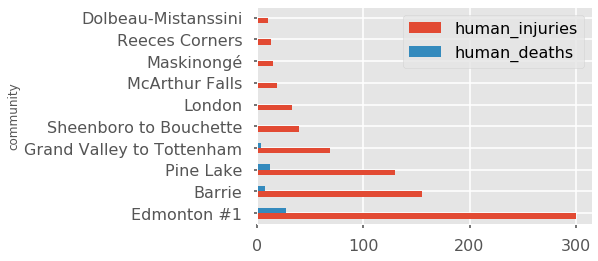

In [67]:
# Cities that have suffered the most injuries due to tornadoes
ij.loc[ij['human_injuries'] > 0, ['community',
                    'human_injuries', 'human_deaths']].set_index('community').head(10).plot(kind='barh')